In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv('./input/train.csv')
contFeaturesList = [x for x in train.select_dtypes(exclude=['object']).columns if x not in ['id', 'loss']]
catFeaturesList = [x for x in train.select_dtypes(include=['object']).columns if x not in ['id', 'loss']]
allFeaturesList = contFeaturesList + catFeaturesList

for catF in catFeaturesList:
    gCatF = train.groupby(train[catF])['loss'].mean()
    train[catF] = train[catF].map(gCatF)

In [2]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['loss'])
    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['loss'], cv=cv_folds)
        
    #Print model report:
    #print('\nModel Report')
    #print('\nAccuracy : %.4g' % metrics.accuracy_score(dtrain['loss'].values, dtrain_predictions))
    
    if performCV:
          print('CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g' % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
          
    #Print Feature Importance:
    if printFeatureImportance:
          feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
          feat_imp.plot(kind='bar', title='Feature Importances')
          plt.ylabel('Feature Importance Score')

CV Score : Mean - 0.5490395 | Std - 0.005682153 | Min - 0.5412172 | Max - 0.5558815


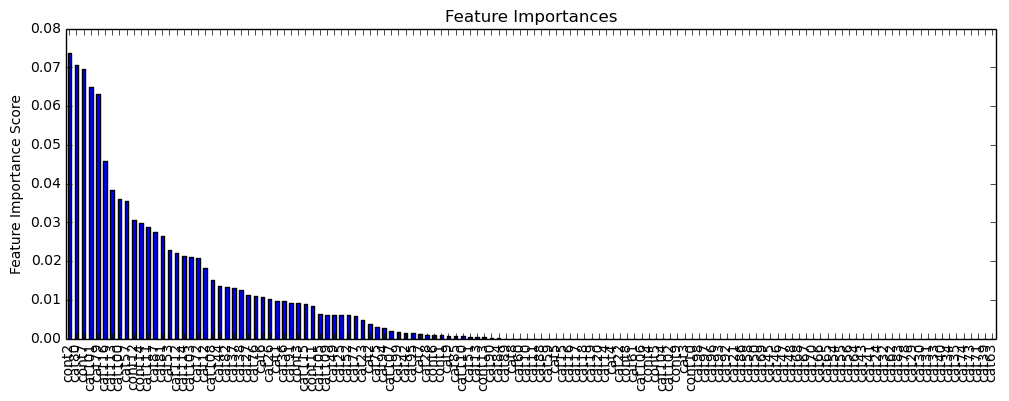

In [3]:
gbm0 = GradientBoostingRegressor(random_state=10)
modelfit(gbm0, train, allFeaturesList)

In [4]:
train.head(2)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,3408.091515,3800.104171,2902.219751,3488.392225,2814.648335,3259.916396,2908.944342,2975.558559,3827.621974,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,3408.091515,3800.104171,2902.219751,2826.826831,2814.648335,3259.916396,2908.944342,2975.558559,3827.621974,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60


In [5]:
#Choose all predictors except target & IDcols
param_test1 = {'n_estimators':[x for x in range(20,81,10)]}
gsearch1 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.1, min_samples_split=2000, max_depth=8, max_features='sqrt', subsample=0.8, random_state=10), param_grid=param_test1, scoring='mean_squared_error', n_jobs=4, iid=False, cv=5)
gsearch1.fit(train[allFeaturesList],train['loss'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=8, max_features='sqrt', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2000,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [7]:
gsearch1.best_estimator_

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=8, max_features='sqrt', max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2000,
             min_weight_fraction_leaf=0.0, n_estimators=80, presort='auto',
             random_state=10, subsample=0.8, verbose=0, warm_start=False)

In [8]:
gsearch1.best_score_

-3690701.8555912464

In [9]:
gsearch1.best_params_

{'n_estimators': 80}